Now that we did the topic modelling with the LDA method, we are going to do it with clustering techniques to see how different the clusters can be. First, we'll apply clustering techniques on a text that was preprocessed with the TF-IDF method. And then, we'll do the same but with sentence embeddings method. 

# Import Data and packages 


In [3]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim import corpora, models, similarities
import numpy as np
from wordcloud import WordCloud
np.random.seed(2020)
import matplotlib.pyplot as plt
from google.colab import drive

import nltk
nltk.download('wordnet')  #Natural Language Toolkit : toolbox to create programs for text analysis

stemmer = SnowballStemmer('english') #Create a new instance of a language specific subclass

from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import nltk
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import pyLDAvis

import hdbscan
import seaborn as sns

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Run next cell if dataset stored on drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/winemag-data_first150k.csv')

In [ ]:
df2=df['description']
#df2['index'] = df2.index
#randomly selecting 10000 observations
df2=df2.sample(n=30000, random_state=1)
descr_list = df2.tolist()

stop_words = ['tannins', 'acidity', 'palate', 'aromas', 'finish', 'drink', 'wine', 'tannin', 'flavors', 'fruits', 'fruit',
              'else', 'however', 'their', 'whereas', 'about', 'am', 'find', 'same', 'amongst', 'were', 'part', 'no', 'bottom', 'forty', 'one', 'where', 'eg', 'with', 'out', 'ourselves', 're', 'without', 'whole', 'next', 'much', 'becoming', 'the', 'any', 'moreover', 'us', 'whose', 'than', 'twenty', 'due', 'cant', 'into', 'i', 'yourselves', 'whoever', 'beside', 'yours', 'been', 'others', 'inc', 'an', 'last', 'more', 'eight', 'hers', 'somewhere', 'hundred', 'everything', 'noone', 'what', 'amount', 'perhaps', 'un', 'afterwards', 'front', 'how', 'meanwhile', 'against', 'become', 'should', 'during', 'that', 'over', 'none', 'among', 'whom', 'beyond', 'alone', 'full', 'she', 'whatever', 'beforehand', 'has', 'several', 'move', 'enough', 'myself', 'off', 'below', 'only', 'call', 'sixty', 'some', 'least', 'three', 'besides', 'five', 'was', 'mine', 'nobody', 'such', 'except', 'her', 'top', 'via', 'few', 'show', 'first', 'are', 'often', 'fifteen', 'itself', 'on', 'take', 'well', 'third', 'now', 'twelve', 'fire', 'nor', 'there', 'whether', 'but', 'because', 'both', 'detail', 'ie', 'further', 'since', 'upon', 'yourself', 'be', 'interest', 'describe', 'otherwise', 'themselves', 'throughout', 'whence', 'while', 'towards', 'who', 'him', 'would', 'ever', 'another', 'almost', 'still', 'etc', 'wherever', 'get', 'go', 'seem', 'thus', 'namely', 'which', 'from', 'these', 'mostly', 'whereupon', 'will', 'himself', 'herein', 'under', 'could', 'amoungst', 'cry', 'herself', 'back', 'he', 'anyone', 'either', 'elsewhere', 'put', 'someone', 'before', 'former', 'latter', 'anywhere', 'give', 'nevertheless', 'those', 'whenever', 'above', 'must', 'keep', 'between', 'latterly', 'eleven', 'as', 'your', 'fifty', 'not', 'everywhere', 'is', 'see', 'have', 'its', 'in', 'thru', 'side', 'though', 'system', 'when', 'within', 'by', 'ltd', 'made', 'also', 'fill', 'whereby', 'nowhere', 'we', 'seeming', 'anyhow', 'empty', 'four', 'you', 'hereafter', 'de', 'cannot', 'thin', 'most', 'therein', 'very', 'serious', 'them', 'here', 'thereupon', 'they', 'whither', 'six', 'whereafter', 'therefore', 'never', 'all', 'behind', 'can', 'ours', 'neither', 'his', 'so', 'hasnt', 'onto', 'please', 'to', 'every', 'along', 'for', 'me', 'our', 'own', 'somehow', 'indeed', 'sometime', 'co', 'nothing', 'toward', 'of', 'rather', 'even', 'many', 'wherein', 'hereby', 'name', 'mill', 'seemed', 'something', 'until', 'up', 'although', 'thence', 'anything', 'became', 'across', 'formerly', 'thereby', 'after', 'together', 'too', 'again', 'at', 'already', 'done', 'once', 'other', 'sincere', 'a', 'it', 'around', 'always', 'ten', 'hereupon', 'less', 'being', 'con', 'yet', 'found', 'why', 'bill', 'thick', 'had', 'this', 'thereafter', 'might', 'becomes', 'hence', 'couldnt', 'seems', 'per', 'down', 'sometimes', 'two', 'everyone', 'nine', 'then', 'if', 'my', 'and', 'through', 'do', 'each', 'anyway', 'may', 'or']


processed_description = [[token for token in simple_preprocess(description) if token not in STOPWORDS] for description in df2]

After analysing first results, we decided to remove some extra words, added to the stop words list (such as wine, tannins, ...).
This improved our resutlts and allowed us to better name topics.

# TF-IDF clustering

1. TF-IDF

> First, We wanted to apply clustering methods to our pre-processed data with a simple and common method. The TF-IDF(Term frequency-inverse document frequency) is a weighted representation of the text that will describe the occurence of words within the reviews. It will show how relevant a word is to a document in a set of documents (Here how relevant is a word to a review accross all reviews).  And we find it by multiplying two things: the Term frequency (TF) i.e. how many times a word appears in a document, and the inverse document frequency (IDF) of the word in all the documents, i.e. if the word is rare or not compare to all documents.

<br>

> We also removed a list of stop words and used the TfidfVectorizer from scikit-learn package, we chose not to use the sklearn stop words list as we found some issues with it. It gives us a matrix with 10000 vectors here.







In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X1 = vectorizer.fit_transform(descr_list)

2. K-means clustering 

> Now, we almost have everything to do the clustering. We choose to perform the clustering with the K-mean algorithm, which is a simple unsupervised machine learning algorithm that will regroup our data into K clusters. And the number of clusters K needs to be specified by us. To do so we used the elbow method to find the optimal k, number of clusters. 

> The elbow method consists in running k-means clustering on the dataset for different values of k ( here from 2 to 9) and for each k it computes the sum of square distances from each point to its assigned center. Then we can plot the score for each k and the line should look like an arm where the "elbow" is supposed to be the best value of k. On the following plot bellow, we can guess that the elbow is around k equal 4. So we’ll chose k = 4 for the rest. 



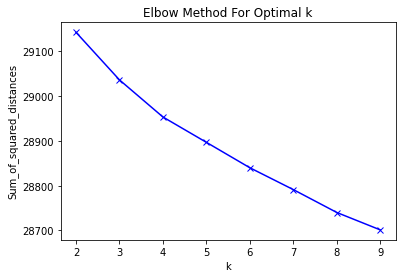

In [ ]:
## This code takes a long time to run ##

Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X1)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Now we can do the clustering with the Kmeans algorithm. We chose the default 'n-init' which means that the k-means algorithm will be run 10 times with different centroid seeds and the the final resultas will be the best one in regarding the inertia. Concerning the 'max_iter', which represents the maximum number of iterations the k-means algorithm can take for a single run, we chose 200 iteractions.

In [ ]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Here we store 25 principal terms of each cluster in a dataframe :

In [ ]:
result=pd.DataFrame(columns = ['cluster', 'word'])

#print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    #print("Cluster %d:" % i)
    for ind in order_centroids[i, :25]:
        #print(' %s' % terms[ind])
        result = result.append({'cluster' : i, 'word' : terms[ind]}, ignore_index=True)

Now, we display a word cloud for each cluster: 

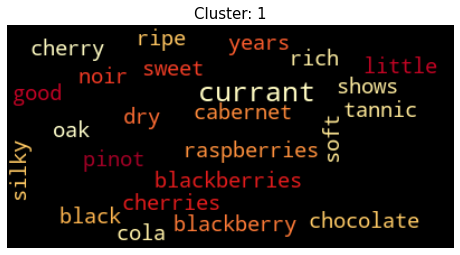

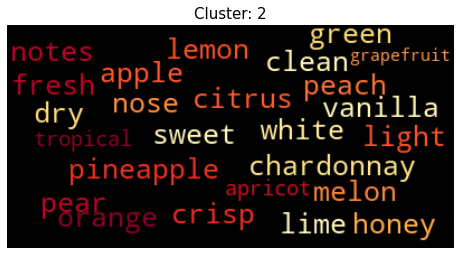

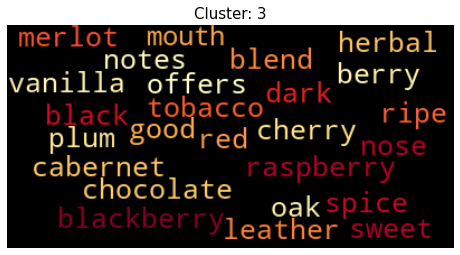

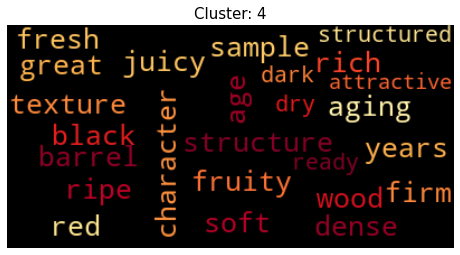

In [ ]:
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['word'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=25, max_words=100, background_color="black", colormap='YlOrRd').generate(text)
   plt.figure(figsize=(8,8))
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.title('Cluster: {}'.format(k+1), size=15)
   plt.show()

### Highlighting topics

Topic 1 : Probably red wine, cabernet grape variety, probably a predominance of a berry aroma and a dry wine.

Topic 2 : Probably a white wine, chardonnay grape variety, could be more about wine with a citrus and peach aroma and dry wine. 

Topic 3 : probably red wine , merlot grape variety, predominance of a spice aroma. 

Topic 4 : probably red wine, probably a predominance of a wood aroma, old wine maybe .

## Bigram


<br>

https://www.youtube.com/watch?v=dZvCHz6lcGU

<br>

We do a Bigram that will display the 25 most important word couple of all the reviews: 

In [ ]:
processed_description2 = [item for sublist in processed_description for item in sublist] #to put in one list  
finder = BigramCollocationFinder.from_words(processed_description2)

finder.apply_freq_filter(3)
print('\n', 'The 25 most important word associations are: ', '\n')
finder.nbest(BigramAssocMeasures.likelihood_ratio, 25)


 The 25 most important word associations are:  



[('pinot', 'noir'),
 ('cabernet', 'sauvignon'),
 ('black', 'cherry'),
 ('sauvignon', 'blanc'),
 ('medium', 'bodied'),
 ('barrel', 'sample'),
 ('petit', 'verdot'),
 ('ready', 'drink'),
 ('petite', 'sirah'),
 ('black', 'currant'),
 ('buttered', 'toast'),
 ('cabernet', 'franc'),
 ('green', 'apple'),
 ('bone', 'dry'),
 ('residual', 'sugar'),
 ('fruit', 'flavors'),
 ('tropical', 'fruit'),
 ('age', 'years'),
 ('cool', 'climate'),
 ('milk', 'chocolate'),
 ('stone', 'fruit'),
 ('root', 'beer'),
 ('single', 'vineyard'),
 ('crisp', 'acidity'),
 ('new', 'oak')]

# Sentence embedding clustering

> Now, we are going to do clustering, but with a sentence embedding preprocessing method. Sentence embedding is a technique that represent all the sentences (here each review) and their semantic information as vectors. Contrary to word embedding, it will captures the context intention and nuances of each review. 


>







1.   Sentence embedding 

We will first prepare the data for training the Doc2vec Model 





In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(descr_list)]

We train the model with the parameters = 
- vector_size that represents the feature vectors Dimensionality
- window that represents the maximum distance between the current and predicted word within a sentence
- min_count that ignores all words with total frequency lower than what we indicate
- alpha that represents the initial learning rate
- min_alpha which is the learning rate towards which alpha will tend

In [ ]:
d2v_model = Doc2Vec(documents, size = 100, window = 10, min_count = 500, workers=7, dm = 1,alpha=0.025, min_alpha=0.001)
d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


2. KMeans clustering 

> Here we do the same kmeans clustering as in the previous part :


In [ ]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=200, n_init=10) 
X_Kmeans = kmeans_model.fit(d2v_model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


We display each sentence with its corresponding cluster : 

In [ ]:
df_doc2vec = pd.DataFrame({'sentences' : descr_list, 'cluster' : labels})
df_doc2vec

,sentences,cluster
0,The color and aromas are true to both Pinot No...,2
1,"This is a standard, everyday Zinfandel that's ...",1
2,The top wine in the Rocim range is produced fr...,0
3,Pietro Clementi's fresh Ripasso is redolent of...,0
4,Falezza's Ripasso opens with an awkward nose t...,1
...,...,...
29995,There's a very interesting and unique Asian qu...,1
29996,This tiny production SB is sweet and easygoing...,1
29997,"A soft, perfumed wine, it shows attractive lig...",1
29998,Slightly granular smelling and seemingly overs...,1


### Clouds of Words to help find topics

Here, we'll try to highlight each cluster's topic by applying TF_IDF on each cluster and displaying a word cloud with the 25 most important words.   

In [ ]:
df_doc2vec0 = df_doc2vec.loc[df_doc2vec['cluster'] == 0]
df_doc2vec1 = df_doc2vec.loc[df_doc2vec['cluster'] == 1]
df_doc2vec2 = df_doc2vec.loc[df_doc2vec['cluster'] == 2]
df_doc2vec3 = df_doc2vec.loc[df_doc2vec['cluster'] == 3]

doc2vec0_list = df_doc2vec0['sentences'].tolist()
doc2vec1_list = df_doc2vec1['sentences'].tolist()
doc2vec2_list = df_doc2vec2['sentences'].tolist()
doc2vec3_list = df_doc2vec3['sentences'].tolist()

vectorizer = TfidfVectorizer(stop_words=stop_words)

For each cluster we first display all the keywords and their score in descending order and we display its word cloud with the 25 most important words. We also display a bigram for each cluster. With all of this we are trying highlight the topics

### Cluster 1




In [ ]:
X0 = vectorizer.fit_transform(doc2vec0_list)

scores = zip(vectorizer.get_feature_names(),
              np.asarray(X0.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
'''
for item in sorted_scores:
    print ("{0:50} Score: {1}".format(item[0], item[1]))
'''

df_sorted_scores0 = pd.DataFrame(sorted_scores, columns=['keyword', 'score'])
df_sorted_scores0.head()

,keyword,score
0,cherry,233.452457
1,ripe,216.405091
2,dry,208.499773
3,black,206.968972
4,sweet,198.044702


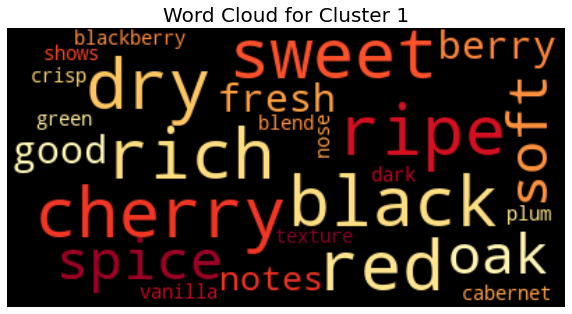


 The top 25 word couples in Cluster 1 are:  



[('pinot', 'noir'),
 ('cabernet', 'sauvignon'),
 ('sauvignon', 'blanc'),
 ('black', 'cherry'),
 ('barrel', 'sample'),
 ('medium', 'bodied'),
 ('ready', 'drink'),
 ('petite', 'sirah'),
 ('petit', 'verdot'),
 ('black', 'currant'),
 ('cabernet', 'franc'),
 ('buttered', 'toast'),
 ('bone', 'dry'),
 ('cool', 'climate'),
 ('green', 'apple'),
 ('age', 'years'),
 ('residual', 'sugar'),
 ('fruit', 'flavors'),
 ('root', 'beer'),
 ('firm', 'tannins'),
 ('tropical', 'fruit'),
 ('easy', 'drinking'),
 ('single', 'vineyard'),
 ('crisp', 'acidity'),
 ('smoky', 'oak')]

In [ ]:
text = df_sorted_scores0.head(25)['keyword'].str.cat(sep=' ')
text = text.lower()
text=' '.join([word for word in text.split()])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", colormap='YlOrRd').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Cluster 1', size=20)
plt.show()

cluster0 = [[token for token in simple_preprocess(description) if token not in STOPWORDS] for description in doc2vec0_list]
cluster00 = [item for sublist in cluster0 for item in sublist]


finder = BigramCollocationFinder.from_words(cluster00)
finder.apply_freq_filter(3)
print('\n','The top 25 word couples in Cluster 1 are: ', '\n')
finder.nbest(BigramAssocMeasures.likelihood_ratio, 25)

### Cluster 2

In [ ]:
X1 = vectorizer.fit_transform(doc2vec1_list)

scores = zip(vectorizer.get_feature_names(),
              np.asarray(X1.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
'''
for item in sorted_scores:
    print ("{0:50} Score: {1}".format(item[0], item[1]))
'''

df_sorted_scores1 = pd.DataFrame(sorted_scores, columns=['keyword', 'score'])
df_sorted_scores1.head()

,keyword,score
0,cherry,232.556459
1,ripe,215.276074
2,sweet,211.629676
3,dry,200.108434
4,red,190.563189


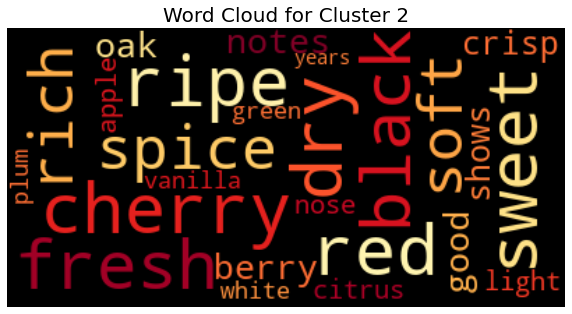


 The top 25 word couples in Cluster 2 are:  



[('pinot', 'noir'),
 ('black', 'cherry'),
 ('ready', 'drink'),
 ('cabernet', 'sauvignon'),
 ('medium', 'bodied'),
 ('residual', 'sugar'),
 ('buttered', 'toast'),
 ('barrel', 'sample'),
 ('green', 'apple'),
 ('black', 'currant'),
 ('bone', 'dry'),
 ('sauvignon', 'blanc'),
 ('stone', 'fruit'),
 ('fruit', 'flavors'),
 ('tropical', 'fruit'),
 ('age', 'years'),
 ('stainless', 'steel'),
 ('milk', 'chocolate'),
 ('red', 'berry'),
 ('petit', 'verdot'),
 ('forest', 'floor'),
 ('new', 'oak'),
 ('crisp', 'acidity'),
 ('high', 'alcohol'),
 ('root', 'beer')]

In [ ]:
text = df_sorted_scores1.head(25)['keyword'].str.cat(sep=' ')
text = text.lower()
text=' '.join([word for word in text.split()])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", colormap='YlOrRd').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Cluster 2', size=20)
plt.show()

cluster1 = [[token for token in simple_preprocess(description) if token not in STOPWORDS] for description in doc2vec1_list]
cluster11 = [item for sublist in cluster1 for item in sublist]


finder = BigramCollocationFinder.from_words(cluster11)
finder.apply_freq_filter(3)
print('\n','The top 25 word couples in Cluster 2 are: ', '\n')
finder.nbest(BigramAssocMeasures.likelihood_ratio, 25)

### Cluster 3

In [ ]:
X2 = vectorizer.fit_transform(doc2vec2_list)

scores = zip(vectorizer.get_feature_names(),
              np.asarray(X2.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
'''
for item in sorted_scores:
    print ("{0:50} Score: {1}".format(item[0], item[1]))
'''

df_sorted_scores2 = pd.DataFrame(sorted_scores, columns=['keyword', 'score'])
df_sorted_scores2.head()

,keyword,score
0,cherry,132.825109
1,black,122.476261
2,ripe,119.197959
3,dry,117.943915
4,spice,106.970967


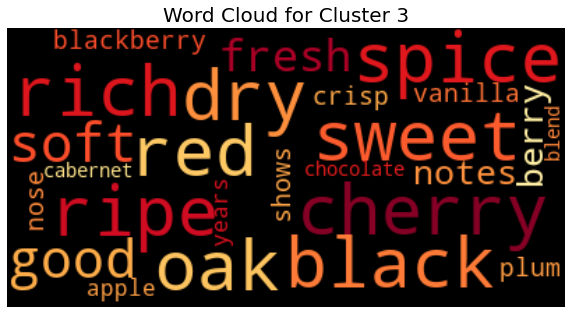


 The top 25 word couples in Cluster 3 are:  



[('pinot', 'noir'),
 ('cabernet', 'sauvignon'),
 ('black', 'cherry'),
 ('medium', 'bodied'),
 ('petit', 'verdot'),
 ('sauvignon', 'blanc'),
 ('ready', 'drink'),
 ('barrel', 'sample'),
 ('petite', 'sirah'),
 ('cabernet', 'franc'),
 ('buttered', 'toast'),
 ('black', 'currant'),
 ('bone', 'dry'),
 ('milk', 'chocolate'),
 ('age', 'years'),
 ('green', 'apple'),
 ('high', 'alcohol'),
 ('cool', 'climate'),
 ('fruit', 'flavors'),
 ('tropical', 'fruit'),
 ('new', 'oak'),
 ('root', 'beer'),
 ('single', 'vineyard'),
 ('dark', 'chocolate'),
 ('black', 'pepper')]

In [ ]:
text = df_sorted_scores2.head(25)['keyword'].str.cat(sep=' ')
text = text.lower()
text=' '.join([word for word in text.split()])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", colormap='YlOrRd').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Cluster 3', size=20)
plt.show()

cluster2 = [[token for token in simple_preprocess(description) if token not in STOPWORDS] for description in doc2vec2_list]
cluster22 = [item for sublist in cluster2 for item in sublist]


finder = BigramCollocationFinder.from_words(cluster22)
finder.apply_freq_filter(3)
print('\n','The top 25 word couples in Cluster 3 are: ', '\n')
finder.nbest(BigramAssocMeasures.likelihood_ratio, 25)

### Cluster 4

In [ ]:
X3 = vectorizer.fit_transform(doc2vec3_list)

scores = zip(vectorizer.get_feature_names(),
              np.asarray(X3.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
'''
for item in sorted_scores:
    print ("{0:50} Score: {1}".format(item[0], item[1]))
'''

df_sorted_scores3 = pd.DataFrame(sorted_scores, columns=['keyword', 'score'])
df_sorted_scores3.head()

,keyword,score
0,black,94.321384
1,cherry,90.195048
2,ripe,82.983022
3,dry,78.551838
4,spice,73.507340


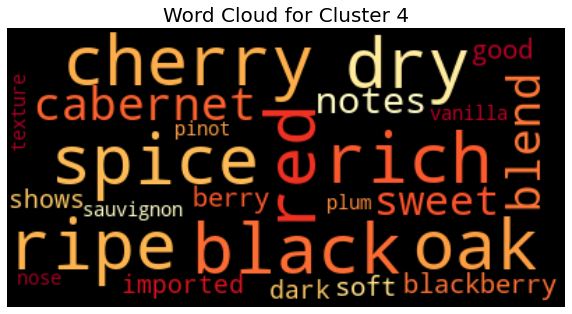


 The top 25 word couples in Cluster 4 are:  



[('cabernet', 'sauvignon'),
 ('pinot', 'noir'),
 ('petit', 'verdot'),
 ('sauvignon', 'blanc'),
 ('black', 'cherry'),
 ('petite', 'sirah'),
 ('cabernet', 'franc'),
 ('medium', 'bodied'),
 ('black', 'currant'),
 ('barrel', 'sample'),
 ('finish', 'drink'),
 ('black', 'fruit'),
 ('french', 'oak'),
 ('brown', 'sugar'),
 ('cab', 'franc'),
 ('needs', 'time'),
 ('cool', 'climate'),
 ('nero', 'avola'),
 ('single', 'vineyard'),
 ('ready', 'drink'),
 ('white', 'pepper'),
 ('long', 'finish'),
 ('fruit', 'flavors'),
 ('sauvignon', 'merlot'),
 ('merlot', 'cabernet')]

In [ ]:
text = df_sorted_scores3.head(25)['keyword'].str.cat(sep=' ')
text = text.lower()
text=' '.join([word for word in text.split()])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", colormap='YlOrRd').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Cluster 4', size=20)
plt.show()

cluster3 = [[token for token in simple_preprocess(description) if token not in STOPWORDS] for description in doc2vec3_list]
cluster33 = [item for sublist in cluster3 for item in sublist]


finder = BigramCollocationFinder.from_words(cluster33)
finder.apply_freq_filter(3)
print('\n','The top 25 word couples in Cluster 4 are: ', '\n')
finder.nbest(BigramAssocMeasures.likelihood_ratio, 25)

## Sentence Embedding Clustering Conclusion

We used TF-IDF on each cluster to try and highlight topics within each group. The results were less easy to interpret than for the previous clustering as no clear topic seems to appear for each cluster, maybe the processing within each group should be done with other methods to get the clear subject of each cluster. <br>
Sentence embedding might be a better pre processing method than strictly TF-IDF as it takes context into account, but it is more difficult to clearly name a topic.